In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/python-packages')

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import mode

import snf
from snf import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sksurv.nonparametric import kaplan_meier_estimator

from sklearn.metrics import pairwise_distances
import random
import multiprocessing

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

from multiprocessing import Pool
import time
import contextlib
import io

Dataset

In [4]:
clinical_GBM = pd.read_csv('/content/drive/MyDrive/data/clinical_GBM.csv')
clinical_GBM.dtypes

Patient ID     object
Time          float64
status          int64
dtype: object

In [5]:
clinical_GBM['status'].value_counts()

status
1    417
0    124
Name: count, dtype: int64

Text(0.5, 1.0, 'GBM')

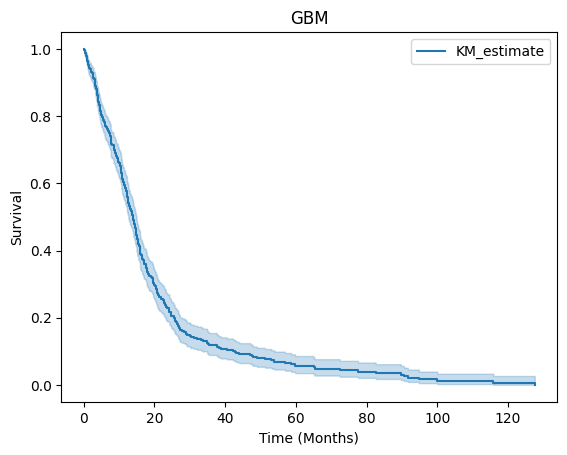

In [6]:
kmf1 = KaplanMeierFitter()
kmf1.fit(durations=clinical_GBM['Time'],event_observed=clinical_GBM['status'])
# to get all survival probability : kmg0.survival_function_
plt.figure()
kmf1.plot()
plt.xlabel('Time (Months)')
plt.ylabel('Survival')
plt.title('GBM')

In [7]:
data_rna = pd.read_csv('/content/drive/MyDrive/data/GBM_RNA_data.csv').T
data_rna

,0,1,2,3,4,5,6,7,8,9,...,60650,60651,60652,60653,60654,60655,60656,60657,60658,60659
TCGA-27-2521-01A-01R-1850-01,5.8836,1.3023,115.9459,6.9493,4.3589,6.8639,2.4921,30.7555,17.7058,19.6703,...,0.0,0.0,0.4021,0.0,0.000,0.0,9.9826,0.0,0.0154,1.4962
TCGA-19-1390-01A-01R-1850-01,21.6593,0.0472,58.7679,6.2764,6.9562,19.6550,3.5974,27.9751,20.4718,61.4327,...,0.0,0.0,1.1248,0.0,0.000,0.0,14.1517,0.0,0.0145,2.9447
TCGA-27-1830-01A-01R-1850-01,70.7455,0.5954,73.9292,6.2558,3.7066,13.5112,11.2121,66.7509,19.0028,20.8152,...,0.0,0.0,0.8551,0.0,0.000,0.0,12.8649,0.0,0.1163,1.7118
TCGA-32-1970-01A-01R-1850-01,60.4303,0.8658,52.6728,5.6279,4.0002,11.5010,16.3642,45.8216,23.7532,26.9724,...,0.0,0.0,0.8128,0.0,0.000,0.0,12.9506,0.0,0.0415,4.3738
TCGA-06-0190-01A-01R-1849-01,70.0066,0.2893,80.6678,4.8642,6.9529,25.5317,24.9163,101.1771,17.4425,28.6862,...,0.0,0.0,0.4046,0.0,0.000,0.0,6.0973,0.0,0.0178,3.0503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-06-0184-01A-01R-1849-01,90.9708,0.4192,67.9240,4.0992,2.8605,23.1985,5.6137,45.6936,13.0025,13.8005,...,0.0,0.0,0.3366,0.0,0.000,0.0,5.9581,0.0,0.0515,1.5100
TCGA-32-2638-01A-01R-1850-01,106.4214,1.6188,93.3104,6.1924,3.9699,11.1514,8.1897,52.9309,10.3635,21.9951,...,0.0,0.0,0.9405,0.0,0.000,0.0,12.1867,0.0,0.0671,2.5755
TCGA-12-3652-01A-01R-1849-01,122.5849,0.3432,119.4728,3.4468,5.1336,5.1676,2.4863,70.0678,11.1193,12.7163,...,0.0,0.0,0.1185,0.0,0.000,0.0,3.0837,0.0,0.0263,1.3066
TCGA-28-5209-01A-01R-1850-01,82.1417,0.5437,83.4400,6.7389,6.4656,7.2134,27.8558,46.0961,15.3365,28.7851,...,0.0,0.0,0.2394,0.0,0.000,0.0,9.9922,0.0,0.0501,2.6272


In [8]:
data_rna.index = data_rna.index.str.split('-', n=3).str[:3].str.join('-')
data_rna

,0,1,2,3,4,5,6,7,8,9,...,60650,60651,60652,60653,60654,60655,60656,60657,60658,60659
TCGA-27-2521,5.8836,1.3023,115.9459,6.9493,4.3589,6.8639,2.4921,30.7555,17.7058,19.6703,...,0.0,0.0,0.4021,0.0,0.000,0.0,9.9826,0.0,0.0154,1.4962
TCGA-19-1390,21.6593,0.0472,58.7679,6.2764,6.9562,19.6550,3.5974,27.9751,20.4718,61.4327,...,0.0,0.0,1.1248,0.0,0.000,0.0,14.1517,0.0,0.0145,2.9447
TCGA-27-1830,70.7455,0.5954,73.9292,6.2558,3.7066,13.5112,11.2121,66.7509,19.0028,20.8152,...,0.0,0.0,0.8551,0.0,0.000,0.0,12.8649,0.0,0.1163,1.7118
TCGA-32-1970,60.4303,0.8658,52.6728,5.6279,4.0002,11.5010,16.3642,45.8216,23.7532,26.9724,...,0.0,0.0,0.8128,0.0,0.000,0.0,12.9506,0.0,0.0415,4.3738
TCGA-06-0190,70.0066,0.2893,80.6678,4.8642,6.9529,25.5317,24.9163,101.1771,17.4425,28.6862,...,0.0,0.0,0.4046,0.0,0.000,0.0,6.0973,0.0,0.0178,3.0503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-06-0184,90.9708,0.4192,67.9240,4.0992,2.8605,23.1985,5.6137,45.6936,13.0025,13.8005,...,0.0,0.0,0.3366,0.0,0.000,0.0,5.9581,0.0,0.0515,1.5100
TCGA-32-2638,106.4214,1.6188,93.3104,6.1924,3.9699,11.1514,8.1897,52.9309,10.3635,21.9951,...,0.0,0.0,0.9405,0.0,0.000,0.0,12.1867,0.0,0.0671,2.5755
TCGA-12-3652,122.5849,0.3432,119.4728,3.4468,5.1336,5.1676,2.4863,70.0678,11.1193,12.7163,...,0.0,0.0,0.1185,0.0,0.000,0.0,3.0837,0.0,0.0263,1.3066
TCGA-28-5209,82.1417,0.5437,83.4400,6.7389,6.4656,7.2134,27.8558,46.0961,15.3365,28.7851,...,0.0,0.0,0.2394,0.0,0.000,0.0,9.9922,0.0,0.0501,2.6272


In [9]:
clinical_GBM[clinical_GBM['Patient ID'].isin(data_rna.index)]

,Patient ID,Time,status
25,TCGA-02-0047,14.7,1
30,TCGA-02-0055,2.5,1
90,TCGA-02-2483,15.3,0
91,TCGA-02-2485,15.4,0
92,TCGA-02-2486,16.2,0
...,...,...,...
527,TCGA-76-4927,17.6,1
528,TCGA-76-4928,3.1,1
529,TCGA-76-4929,3.7,1
530,TCGA-76-4931,9.1,1


Text(0.5, 1.0, 'GBM')

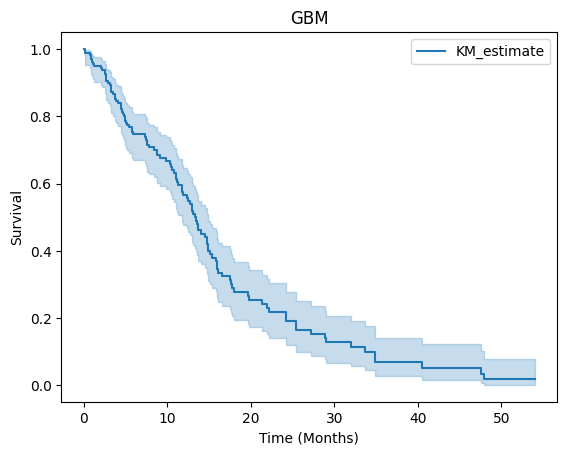

In [10]:
kmf1 = KaplanMeierFitter()
kmf1.fit(durations=clinical_GBM[clinical_GBM['Patient ID'].isin(data_rna.index)]['Time'],event_observed=clinical_GBM[clinical_GBM['Patient ID'].isin(data_rna.index)]['status'])

plt.figure()
kmf1.plot()
plt.xlabel('Time (Months)')
plt.ylabel('Survival')
plt.title('GBM')

In [11]:
clinical_GBM[clinical_GBM['Patient ID'].isin(data_rna.index)]['status'].value_counts()

status
1    107
0     53
Name: count, dtype: int64

In [12]:
GBM_df = clinical_GBM[clinical_GBM['Patient ID'].isin(data_rna.index)].reset_index(drop=True)
GBM_df

,Patient ID,Time,status
0,TCGA-02-0047,14.7,1
1,TCGA-02-0055,2.5,1
2,TCGA-02-2483,15.3,0
3,TCGA-02-2485,15.4,0
4,TCGA-02-2486,16.2,0
...,...,...,...
155,TCGA-76-4927,17.6,1
156,TCGA-76-4928,3.1,1
157,TCGA-76-4929,3.7,1
158,TCGA-76-4931,9.1,1


Genetic Algorithm

In [ ]:
# Function to calculate log-rank test statistic
def logrank_fitness(cluster_indices, time_data, status_data):
    # Extracting data for c1 and c2
    cluster1_time_data = time_data[cluster_indices == 1]
    cluster1_status_data = status_data[cluster_indices == 1]

    cluster2_time_data = time_data[cluster_indices == 2]
    cluster2_status_data = status_data[cluster_indices == 2]

    # log-rank test
    result = logrank_test(cluster1_time_data, cluster2_time_data, event_observed_A=cluster1_status_data, event_observed_B=cluster2_status_data)

    # Returning p-value from log-rank test
    return result.p_value

# Function to initialize population
def initialize_population(population_size, num_patients):
    return [np.random.randint(1, 3, num_patients) for _ in range(population_size)]  #labels -> 1,2

# Function to perform selection based on fitness scores
def selection(population, fitness_scores, num_selected):
    return [population[i] for i in np.argsort(fitness_scores)[:num_selected]]

# Function to perform crossover
def crossover(parent1, parent2, crossover_type):
    if crossover_type == 'one-point':
        crossover_point = random.randint(0, len(parent1) - 1)
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    elif crossover_type == 'two-point':
        point1, point2 = sorted(random.sample(range(len(parent1)), 2))
        child1 = np.concatenate((parent1[:point1], parent2[point1:point2], parent1[point2:]))
        child2 = np.concatenate((parent2[:point1], parent1[point1:point2], parent2[point2:]))
    elif crossover_type == 'uniform':
        mask = np.random.randint(0, 2, size=len(parent1), dtype=bool)
        child1 = np.where(mask, parent1, parent2)
        child2 = np.where(mask, parent2, parent1)
    else:
        raise ValueError("Invalid crossover type. Choose from 'one-point', 'two-point', or 'uniform'.")
    return child1, child2

# Function to perform mutation
def mutation(individual, mutation_rate, mutation_type):
    if mutation_type == 'flip-bit':
        for i in range(len(individual)):
            if random.random() < mutation_rate:
                individual[i] = 2 if individual[i] == 1 else 1  # Flip 2 to 1 or 1 to 2
    elif mutation_type == 'swap':
        for i in range(len(individual)):
            if random.random() < mutation_rate:
                swap_idx = random.randint(0, len(individual) - 1)
                individual[i], individual[swap_idx] = individual[swap_idx], individual[i]
    else:
        raise ValueError("Invalid mutation type. Choose from 'flip-bit' or 'swap'.")
    return individual

# Function to generate new population
def new_population(selected_population,mutation_rate,crossover_type,mutation_type):
    parent1, parent2 = random.sample(selected_population, 2)
    child1, child2 = crossover(parent1, parent2,crossover_type)
    child1 = mutation(child1, mutation_rate,mutation_type)
    child2 = mutation(child2, mutation_rate,mutation_type)
    return child1,child2

# Main-Genetic Algorithm
def genetic_algorithm(time_data, status_data, population_size=100, num_generations=500, mutation_rate=0.01,eps=1e-4, max_consecutive_generations=5, selection_percentage = 0.25,
                      min_cluster_size=0.1,crossover_type='one-point',mutation_type='flip-bit'):
    """
    time_data : number of days/months until the specified event i.e., death
    status_data : Binary Censoring status
    population_size : number of candidate solutions to be generated, default 100
    num_generations : number of iterations, default 500
    mutation_rate : used to decide if the value in candidate solution needs to be flipped or not while mutation process, default 0.01
    eps : epsilon, a small threshold value, indicating that the algorithm terminates if changes are less than this value, default 1e-4
    max_consecutive_generations : the maximum number of consecutive iterations during which the changes must be smaller than epsilon for the algorithm to terminate, default 5
    selection_percentage : indicates the percentage of top candidate solutions to be selected to create new population, default 0.25 (25% of total population)
    min_cluster_size : minimum cluster size, default 0.1 (10% of number of patients)
    crossover_type : type of crossover, possible values : one-point, two-point, uniform ; default one-point
    mutation_type : type of mutation, possible values : flip-bit, swap ; default flip-bit
    """
    # np.random.seed(42)
    # random.seed(42)
    start_time = time.time()
    num_patients = len(time_data)
    min_size = int(num_patients * min_cluster_size)
    population = initialize_population(population_size, num_patients)
    consecutive_generations_without_improvement=0
    pool = multiprocessing.Pool()

    for generation in range(num_generations):
        print(generation)
        fitness_scores = [logrank_fitness(cluster_indices, time_data, status_data) for cluster_indices in population]
        selected_population = selection(population, fitness_scores, int(population_size * selection_percentage))

        with Pool() as pool:
        # We need to run new_population for population_size / 2 times as we get 2 children each time
          args = [(selected_population, mutation_rate,crossover_type,mutation_type) for _ in range(int(population_size // 2))]
          results = pool.starmap(new_population, args)
        # Flatten the list of tuples, and check if cluster size is greater than min_size specified
        offspring_population = [child for pair in results for child in pair if np.all(np.bincount(child)[1:] >= min_size)]


        # Track the best fitness score achieved so far
        current_best_fitness = min(fitness_scores)
        if generation == 0:
          best_fitness = max(fitness_scores)  # setting initial best_fitness score
        print(current_best_fitness)
        # Check for improvement
        if -np.log10(current_best_fitness)+np.log10(best_fitness) <  eps:
            consecutive_generations_without_improvement += 1
        else:
            best_fitness = current_best_fitness
            consecutive_generations_without_improvement = 0

        # Terminate if there's no improvement for a defined number of consecutive generations
        if consecutive_generations_without_improvement >= max_consecutive_generations:
            break
        if generation == num_generations-1:
          print("Algorithm did not converge")
        else:
          population = offspring_population

    best_solution = population[fitness_scores.index(current_best_fitness)]  # Get the corresponding solution
    end_time = time.time()
    print('Total time taken : ',end_time - start_time,' seconds')
    return best_solution, current_best_fitness


In [ ]:
# Testing
best_solution, best_fitness = genetic_algorithm(GBM_df['Time'], GBM_df['status'])
print("Best solution:", best_solution)
print("Best fitness (log-rank p-value):", best_fitness)

0
0.009506883420000643
1
0.00014158109766404224
2
0.0002242676622452011
3
3.1050427992477325e-07
4
1.701291560324243e-08
5
2.108946322053631e-09
6
4.2375523647960253e-10
7
1.0139074030083365e-10
8
3.12998740982782e-11
9
2.5921229710679124e-13
10
2.305959028902916e-14
11
1.7756363789057167e-14
12
2.328341220660853e-16
13
6.653737823635623e-19
14
3.2081531241939574e-19
15
1.1280044050308426e-20
16
3.797254818007364e-24
17
1.41080141619937e-23
18
2.1070142116326403e-24
19
3.5319332535803756e-26
20
3.588776734767964e-26
21
3.319549329804572e-27
22
9.690189667916417e-28
23
1.9666712887920062e-28
24
6.208181923198858e-29
25
2.4112945942479299e-29
26
1.3698009819417534e-30
27
6.347858156695534e-32
28
5.425754501528588e-32
29
5.425754501528588e-32
30
2.686951840173229e-33
31
2.2210629112494315e-33
32
3.3246299411144024e-34
33
4.757056566360553e-36
34
2.933394095083163e-36
35
3.067462126241811e-37
36
3.2633143420206295e-38
37
1.2945664827541254e-37
38
3.0313714987249425e-38
39
9.688750094282383

Text(0.4, 0.5, 'p-value: 1.0360820595008009e-50\nt-statistic: 224.31')

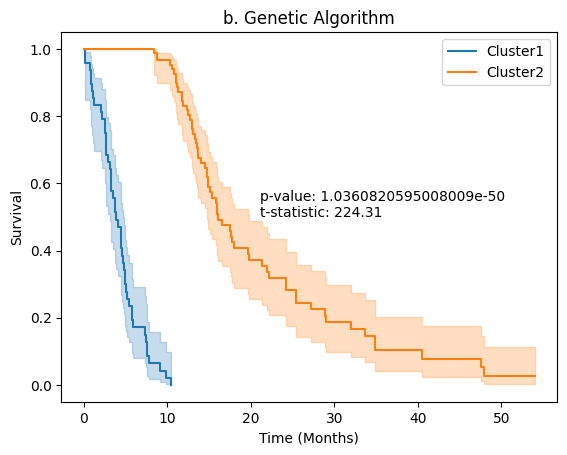

In [ ]:
labels_final = pd.DataFrame({'label': best_solution})
c1 = GBM_df.iloc[labels_final.index[labels_final['label'] == 1].tolist()]
c2 = GBM_df.iloc[labels_final.index[labels_final['label'] == 2].tolist()]
kmf0 = KaplanMeierFitter()
kmf1 = KaplanMeierFitter()
p_val = logrank_test(c1['Time'],c2['Time'],event_observed_A=c1['status'],event_observed_B=c2['status']).p_value
t_stat = logrank_test(c1['Time'],c2['Time'],event_observed_A=c1['status'],event_observed_B=c2['status']).test_statistic
kmf0.fit(durations=c1['Time'],event_observed=c1['status'],label='Cluster1')
kmf1.fit(durations=c2['Time'],event_observed=c2['status'],label='Cluster2')
# to get all survival probability : kmg0.survival_function_
kmf0.plot()
kmf1.plot()
plt.xlabel('Time (Months)')
plt.ylabel('Survival')
plt.title('b. Genetic Algorithm')
plt.text(0.4, 0.5, f'p-value: {p_val:}\nt-statistic: {t_stat:.2f}', transform=plt.gca().transAxes)

In [ ]:
logrank_test(c1['Time'], c2['Time'], event_observed_A=c1['status'], event_observed_B=c2['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         224.31 <0.005    166.05

In [ ]:
labels_final.value_counts()

label
2        111
1         49
Name: count, dtype: int64

Random Search

In [ ]:
def random_search(time_data, status_data,population_size=100):
  num_patients = len(time_data)
  population = initialize_population(population_size, num_patients)
  scores = [logrank_fitness(cluster_indices, time_data, status_data) for cluster_indices in population]
  return scores, population[scores.index(min(scores))]  # solution with best score

In [ ]:
np.random.seed(0)
scores, best_solution = random_search(GBM_df['Time'], GBM_df['status'])

Text(0.6, 0.5, 'p-value: 0.0072\nt-statistic: 7.23')

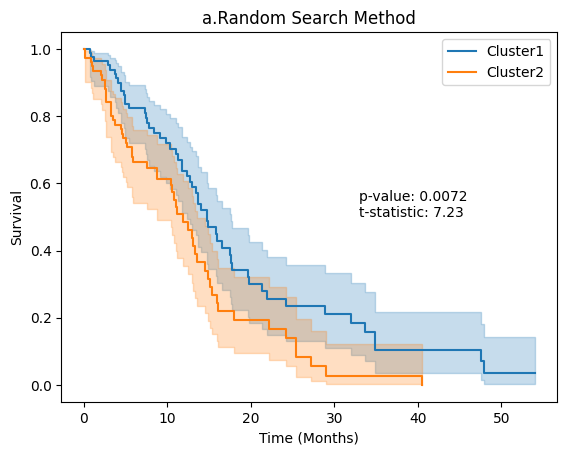

In [ ]:
labels_final = pd.DataFrame({'label': best_solution})
c1 = GBM_df.iloc[labels_final.index[labels_final['label'] == 1].tolist()]
c2 = GBM_df.iloc[labels_final.index[labels_final['label'] == 2].tolist()]
kmf0 = KaplanMeierFitter()
kmf1 = KaplanMeierFitter()
p_val = logrank_test(c1['Time'],c2['Time'],event_observed_A=c1['status'],event_observed_B=c2['status']).p_value
t_stat = logrank_test(c1['Time'],c2['Time'],event_observed_A=c1['status'],event_observed_B=c2['status']).test_statistic
kmf0.fit(durations=c1['Time'],event_observed=c1['status'],label='Cluster1')
kmf1.fit(durations=c2['Time'],event_observed=c2['status'],label='Cluster2')
kmf0.plot()
kmf1.plot()
plt.xlabel('Time (Months)')
plt.ylabel('Survival')
plt.title('a.Random Search Method')
plt.text(0.6, 0.5, f'p-value: {p_val:.4f}\nt-statistic: {t_stat:.2f}', transform=plt.gca().transAxes)


In [ ]:
logrank_test(c1['Time'],c2['Time'],event_observed_A=c1['status'],event_observed_B=c2['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.23 0.01      7.13

In [ ]:
labels_final.value_counts()

label
1        82
2        78
Name: count, dtype: int64

Running RS and GA many times (say 100) to obtain optimal scores for distribution and robust results. I terminated this at 65 runs as it takes a lot of time to run

In [ ]:
scores_RS = []
scores_GA = []
solution_RS = []
solution_GA = []
start_time = time.time()
for i in range(100):
  print(f'Run {i}')
  with contextlib.redirect_stdout(io.StringIO()):  # to avoid print statements inside the GA function
    scores, sol_RS = random_search(GBM_df['Time'], GBM_df['status'])
    sol_GA, best_fitness = genetic_algorithm(GBM_df['Time'], GBM_df['status'])
    scores_RS.append(min(scores))
    solution_RS.append(sol_RS)
    scores_GA.append(best_fitness)
    solution_GA.append(sol_GA)
end_time = time.time()
print('Total time taken : ',end_time - start_time,' seconds')

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20
Run 21
Run 22
Run 23
Run 24
Run 25
Run 26
Run 27
Run 28
Run 29
Run 30
Run 31
Run 32
Run 33
Run 34
Run 35
Run 36
Run 37
Run 38
Run 39
Run 40
Run 41
Run 42
Run 43
Run 44
Run 45
Run 46
Run 47
Run 48
Run 49
Run 50
Run 51
Run 52
Run 53
Run 54
Run 55
Run 56
Run 57
Run 58
Run 59
Run 60
Run 61
Run 62
Run 63
Run 64
Run 65


KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame({
    'scores_RS': scores_RS,
    'solution_RS': solution_RS,
    'scores_GA': scores_GA,
    'solution_GA': solution_GA
})
df.to_csv('/content/drive/MyDrive/data/Results_RS_GA.csv',index=False)

In [14]:
scores = pd.read_csv('/content/drive/MyDrive/data/Results_RS_GA.csv')

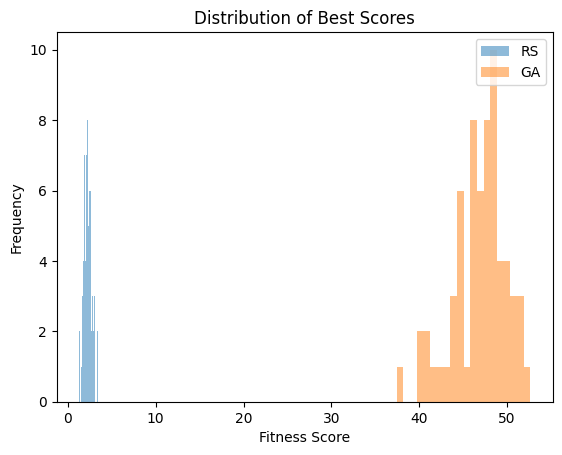

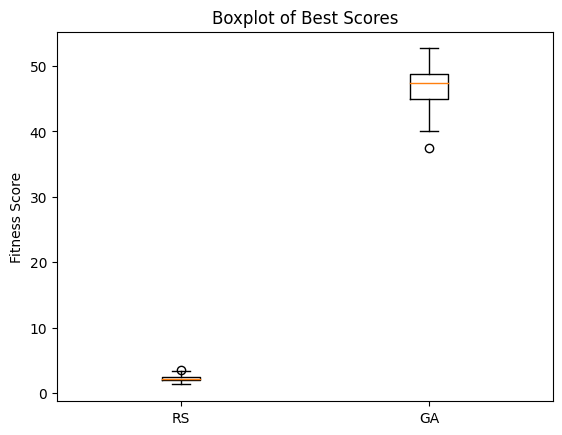

<Axes: ylabel='Density'>

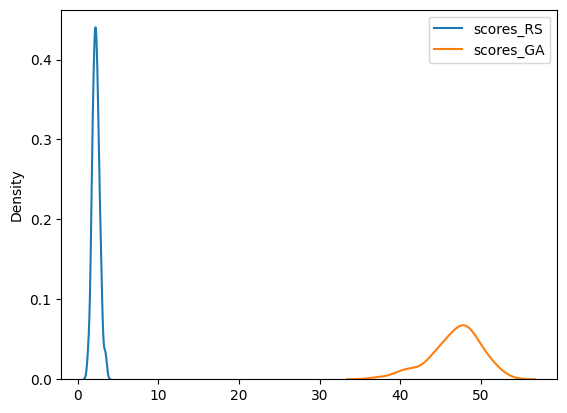

In [22]:
# Plot histograms
plt.figure()
plt.hist(-np.log10(scores['scores_RS']), bins=20, alpha=0.5, label='RS')
plt.hist(-np.log10(scores['scores_GA']), bins=20, alpha=0.5, label='GA')
plt.xlabel('Fitness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Best Scores')
plt.legend(loc='upper right')
plt.show()

# Plot boxplots
plt.figure()
plt.boxplot([-np.log10(scores['scores_RS']),(-np.log10(scores['scores_GA']))], labels=['RS','GA'])
plt.ylabel('Fitness Score')
plt.title('Boxplot of Best Scores')
plt.show()

# KDE density plot
sns.kdeplot([-np.log10(scores['scores_RS']),-np.log10(scores['scores_GA'])])


In [ ]:
# Bootstrap method to calculate Confidence Interval
def bootstrap_CI(data, num_samples=1000, confidence=0.95):
    bootstrap_means = []
    for _ in range(num_samples):
        bootstrap_sample = resample(data)
        bootstrap_means.append(np.mean(bootstrap_sample))
    lower_bound = np.percentile(bootstrap_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence) / 2 * 100)
    return np.mean(data), lower_bound, upper_bound

In [ ]:
mean_RS, LB_RS, UB_RS = bootstrap_CI(scores_RS)
print(f"Random Search : \n Mean : {mean_RS} \n Confidence Interval [{LB_RS},{UB_RS}]")
mean_GA, LB_GA, UB_GA = bootstrap_CI(scores_GA)
print(f"Random Search : \n Mean : {mean_GA} \n Confidence Interval [{LB_GA},{UB_GA}]")

Random Search : 
 Mean : 0.00842128674480645 
 Confidence Interval [0.00645301045367946,0.010627609887992634]
Random Search : 
 Mean : 5.568189985548273e-40 
 Confidence Interval [4.4121418087572966e-43,1.6676438972138455e-39]


In [ ]:
# To obtain final cluster assignment for GA, majority voting has been considered
def majority_voting(cluster_assignments):
    cluster_assignments = np.array(cluster_assignments)
    final_clusters, counts = mode(cluster_assignments, axis=0)
    return final_clusters.flatten(), counts.flatten()

cluster_assignments = np.array(solution_GA)
final_cluster, count = majority_voting(cluster_assignments)

In [ ]:
voting_df = pd.DataFrame({'label':final_cluster,'count':count})
voting_df.sort_values('count')

,label,count
71,1,33
73,1,33
124,1,33
51,1,33
134,1,33
...,...,...
60,2,39
54,1,39
69,2,41
46,2,42


Text(0.4, 0.5, 'p-value: 1.8035731326406213e-47\nt-statistic: 209.46')

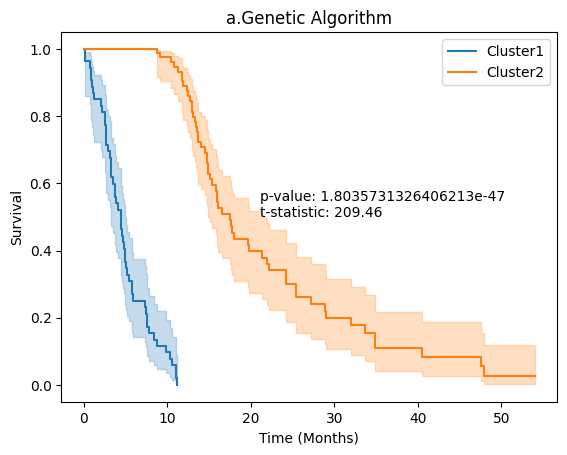

In [ ]:
labels_final = pd.DataFrame({'label': final_cluster})
c1 = GBM_df.iloc[labels_final.index[labels_final['label'] == 1].tolist()]
c2 = GBM_df.iloc[labels_final.index[labels_final['label'] == 2].tolist()]
kmf0 = KaplanMeierFitter()
kmf1 = KaplanMeierFitter()
p_val = logrank_test(c1['Time'],c2['Time'],event_observed_A=c1['status'],event_observed_B=c2['status']).p_value
t_stat = logrank_test(c1['Time'],c2['Time'],event_observed_A=c1['status'],event_observed_B=c2['status']).test_statistic
kmf0.fit(durations=c1['Time'],event_observed=c1['status'],label='Cluster1')
kmf1.fit(durations=c2['Time'],event_observed=c2['status'],label='Cluster2')
kmf0.plot()
kmf1.plot()
plt.xlabel('Time (Months)')
plt.ylabel('Survival')
plt.title('a.Genetic Algorithm')
plt.text(0.4, 0.5, f'p-value: {p_val:}\nt-statistic: {t_stat:.2f}', transform=plt.gca().transAxes)


In [ ]:
labels_final.value_counts()

label
2        106
1         54
Name: count, dtype: int64